#Performing EDA on Zillow Home Value Dataset using D3.js



In [7]:
!pip install pandas matplotlib seaborn

##Import Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import files

# Load the dataset
df = pd.read_csv("/content/Kaggle/ZHVI.csv")
df.head()  # Display the first 5 rows

,Unnamed: 0,Virginia,California,Florida,New York,New Jersey,Texas,Michigan,Massachusetts,Arizona,...,Kentucky,Missouri,Kansas,Delaware,Wyoming,Oklahoma,South Dakota,Nebraska,Iowa,Ohio
0,2000-01-01,123345.473614,187686.834174,106914.485631,152590.518413,168867.679212,111067.066209,117182.277648,194441.917330,134673.832237,...,84888.599949,96355.615376,87834.707252,147889.117640,NaN,81317.065187,109089.176451,114901.507751,91262.656887,105495.852748
1,2000-02-01,123664.646325,188317.705644,107146.072359,153133.890550,169322.887219,111127.422922,117246.818849,195091.094211,134917.766139,...,84932.427517,96468.551581,87851.949371,148119.199167,NaN,81350.608683,108857.397991,115085.182561,91437.055539,105560.320284
2,2000-03-01,124003.044321,189169.536612,107426.801636,153656.973859,169757.235852,111156.696873,117483.108630,195863.512259,135231.713552,...,85012.169982,96637.635413,87953.530209,148405.671377,NaN,81506.965663,108533.041186,115255.415328,91601.695177,105658.088719
3,2000-04-01,124642.503988,191018.607652,107997.452052,154781.983857,170719.549120,111301.986089,117953.796944,197384.850108,135872.776075,...,85210.337303,97024.123101,88105.386492,149060.826832,NaN,81791.683527,108095.842999,115519.668238,91957.312292,105945.581521
4,2000-05-01,125259.832254,193167.874191,108612.837031,155945.967050,171700.551833,111396.077663,118647.924837,199031.623407,136599.429512,...,85473.707171,97523.353180,88334.296242,149808.060789,NaN,82174.103896,107913.955778,115653.673395,92350.214292,106383.936553


##Overview of the Dataset

In [10]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
df.info()
print("Missing values in each column:")
print(df.isnull().sum())

Dataset contains 297 rows and 52 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                297 non-null    object 
 1   Virginia                  297 non-null    float64
 2   California                297 non-null    float64
 3   Florida                   297 non-null    float64
 4   New York                  297 non-null    float64
 5   New Jersey                297 non-null    float64
 6   Texas                     297 non-null    float64
 7   Michigan                  297 non-null    float64
 8   Massachusetts             297 non-null    float64
 9   Arizona                   296 non-null    float64
 10  Washington                297 non-null    float64
 11  Colorado                  297 non-null    float64
 12  Illinois                  297 non-null    float64
 13  the District of Columbi

##Performing Data Cleaning and Removing duplicates



In [11]:
df_cleaned = df.dropna()
df['Virginia'].fillna(df['Virginia'].mean(), inplace=True)
df['Virginia'].fillna(df['Virginia'].mode()[0], inplace=True)
df_cleaned = df.drop_duplicates()
df['Virginia'] = pd.to_datetime(df['Virginia'])  # Convert to datetime
df['Virginia'] = df['Virginia'].astype('int')    # Convert to integer

<ipython-input-11-482e4d4e379c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Virginia'].fillna(df['Virginia'].mean(), inplace=True)
<ipython-input-11-482e4d4e379c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

##Performing Descriptive Analysis

In [12]:
print(df.describe())  # For numerical columns
print(df.describe(include=['object']))  # For categorical columns
print(df['California'].value_counts())

           Virginia     California        Florida       New York  \
count     297.00000     297.000000     297.000000     297.000000   
mean   242487.79798  429145.132798  207179.483660  288656.412429   
std     63730.13515  156266.876791   79452.693823   77960.390719   
min    123345.00000  187686.834174  106914.485631  152590.518413   
25%    214351.00000  301556.590242  144823.914896  253787.073061   
50%    237064.00000  412385.368123  188508.754915  273168.670796   
75%    265324.00000  523548.166796  243882.457732  326718.843803   
max    392433.00000  773239.117639  397409.755977  480515.870203   

          New Jersey          Texas       Michigan  Massachusetts  \
count     297.000000     297.000000     297.000000     297.000000   
mean   322526.218710  170325.952213  147371.768631  365521.561834   
std     79099.356726   58160.312071   40109.979024   99571.806112   
min    168867.679212  111067.066209   94106.295321  194441.917330   
25%    278516.151813  132901.495038  12118

##Correlation Matrix

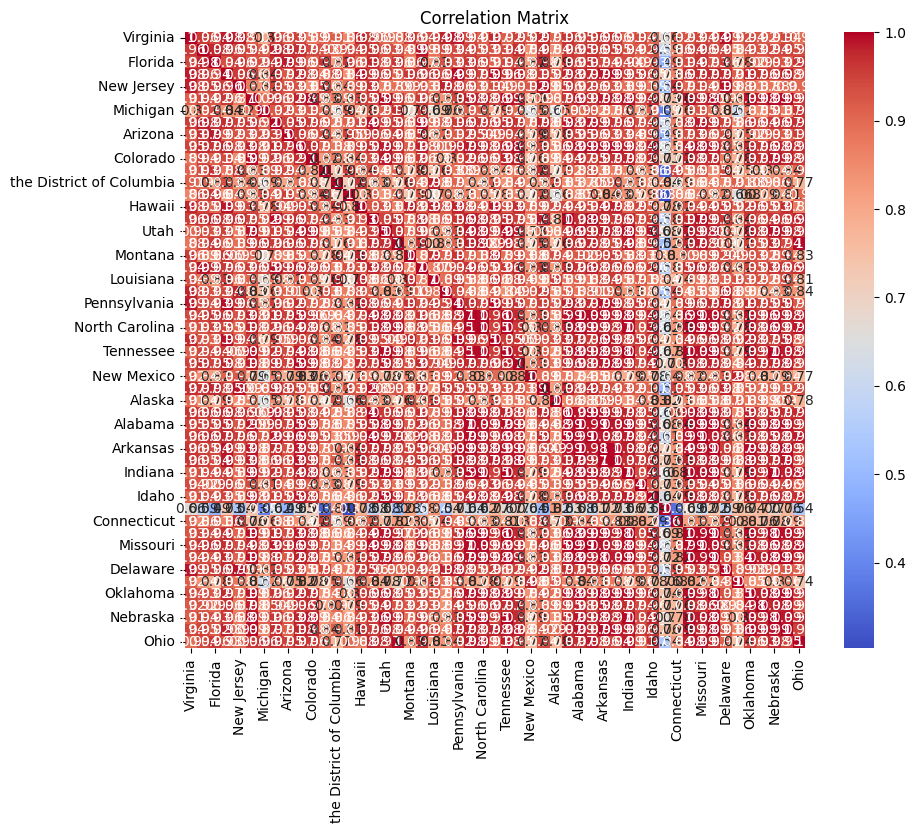

In [13]:
# Ensure numeric columns are selected
numeric_df = df.select_dtypes(include=['number'])

# Handle null values if present
numeric_df = numeric_df.fillna(0)

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Validate and plot
if correlation_matrix.empty:
    print("Correlation matrix is empty. Ensure dataset has numeric columns.")
else:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title("Correlation Matrix")
    plt.show()

## Data Visualization

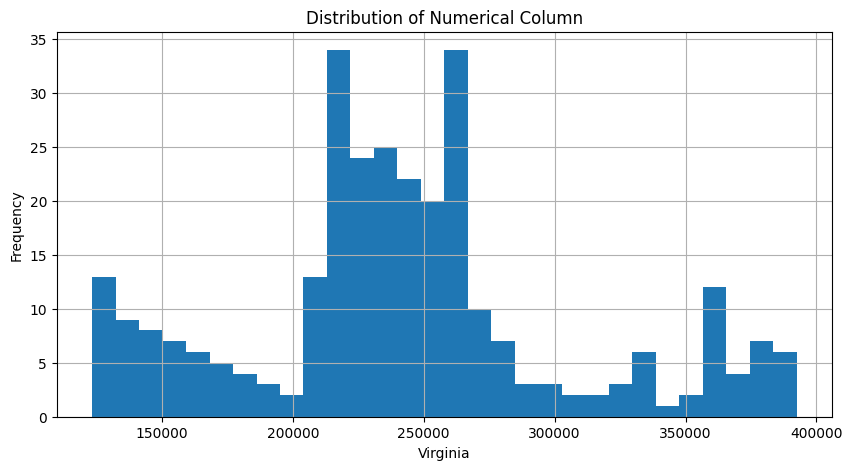

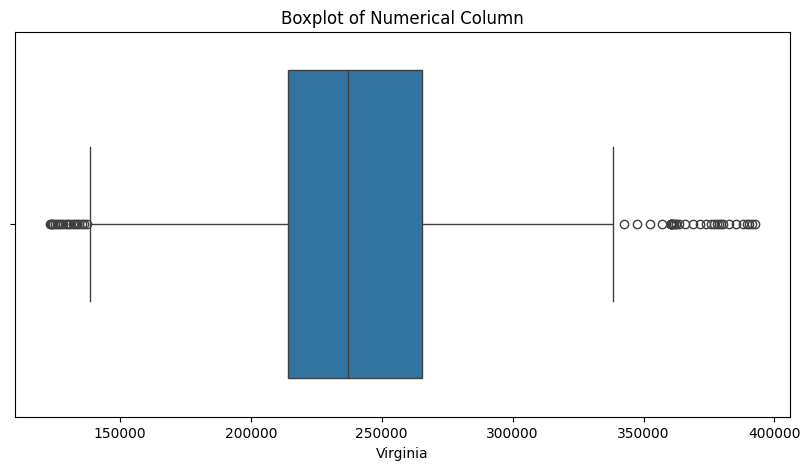

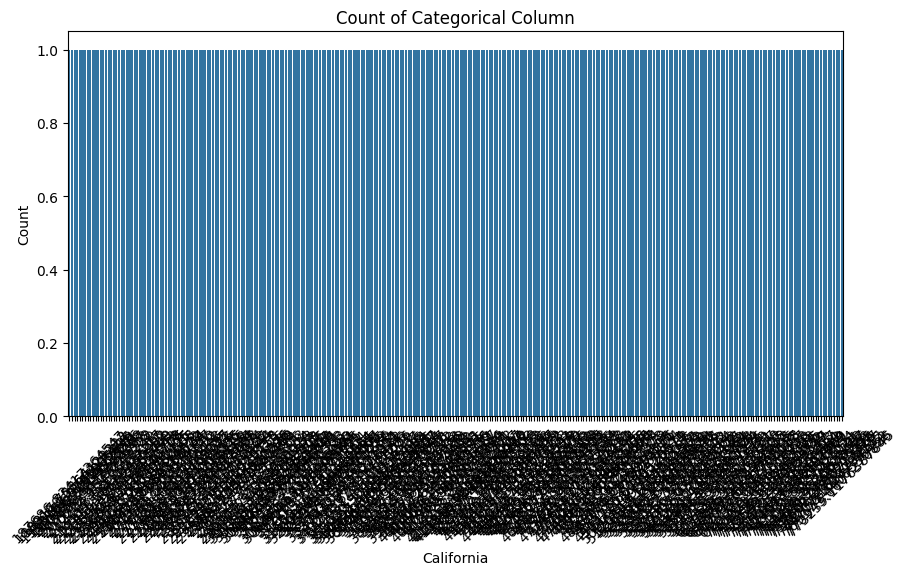

In [14]:
# Replace with your column names
numerical_column = 'Virginia'
categorical_column = 'California'

# Ensure the numerical column is valid
if numerical_column in df.columns:
    # Handle missing or non-numeric values
    df[numerical_column] = pd.to_numeric(df[numerical_column], errors='coerce').fillna(0)

    # Histogram for numerical column
    plt.figure(figsize=(10, 5))
    df[numerical_column].hist(bins=30)
    plt.title("Distribution of Numerical Column")
    plt.xlabel(numerical_column)
    plt.ylabel("Frequency")
    plt.show()

    # Boxplot for numerical column
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[numerical_column])
    plt.title("Boxplot of Numerical Column")
    plt.show()
else:
    print(f"Column {numerical_column} does not exist in the dataset.")

# Ensure the categorical column is valid
if categorical_column in df.columns:
    # Countplot for categorical column
    plt.figure(figsize=(10, 5))
    sns.countplot(x=categorical_column, data=df)
    plt.title("Count of Categorical Column")
    plt.xlabel(categorical_column)
    plt.ylabel("Count")
    plt.xticks(rotation=45)  # Rotate labels if needed
    plt.show()
else:
    print(f"Column {categorical_column} does not exist in the dataset.")

##Adding D3.js to Colab

In [15]:
from IPython.core.display import display, HTML

In [16]:
HTML("""
<script src="https://d3js.org/d3.v6.min.js"></script>
<div id="d3-container"></div>
<style>
    .bar { fill: steelblue; }
    .bar:hover { fill: orange; }
    .axis-label { font-size: 12px; font-family: Arial, sans-serif; }
</style>
""")


##Creating a Custom D3.js Visualization

In [17]:
display(HTML("""
<script>
const data = [10, 20, 30, 40, 50];  // Example data, replace with your dataset

const width = 500, height = 300, margin = 40;

const svg = d3.select("#d3-container")
              .append("svg")
              .attr("width", width)
              .attr("height", height);

const xScale = d3.scaleBand()
                 .domain(data.map((d, i) => i))
                 .range([margin, width - margin])
                 .padding(0.1);

const yScale = d3.scaleLinear()
                 .domain([0, d3.max(data)])
                 .nice()
                 .range([height - margin, margin]);

svg.selectAll(".bar")
   .data(data)
   .enter()
   .append("rect")
   .attr("class", "bar")
   .attr("x", (d, i) => xScale(i))
   .attr("y", d => yScale(d))
   .attr("width", xScale.bandwidth())
   .attr("height", d => height - margin - yScale(d));

svg.append("g")
   .attr("transform", `translate(0,${height - margin})`)
   .call(d3.axisBottom(xScale).tickFormat(i => `Item ${i + 1}`));

svg.append("g")
   .attr("transform", `translate(${margin},0)`)
   .call(d3.axisLeft(yScale));
</script>
"""))
